In [1]:
import numpy as np
import pandas as pd

import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Capture similarity 
from sklearn.metrics.pairwise import linear_kernel

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv("F:\\Course & Studies\\Data Science\\Data Science Projects\\Netflix\\netflix_titles.csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [6]:
data.shape

(6234, 12)

In [7]:
show_type = round((data['type'].value_counts()/data.shape[0])*100,2)

Text(0.5, 1.0, 'Netflix Show Types available')

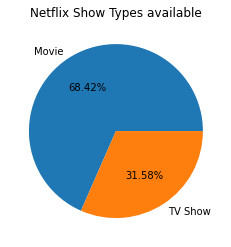

In [8]:
plt.pie(show_type,labels=['Movie','TV Show'],autopct='%1.2f%%')
plt.title("Netflix Show Types available")

In [9]:
show_country = data['country'].value_counts()

In [10]:
show_country

United States                             2032
India                                      777
United Kingdom                             348
Japan                                      176
Canada                                     141
                                          ... 
France, China, Japan, United States          1
United Kingdom,                              1
Finland, Germany, Belgium                    1
Argentina, France                            1
United Kingdom, Germany, United States       1
Name: country, Length: 554, dtype: int64

In [11]:
data.drop(["show_id","director","cast","country","date_added","release_year","rating","duration"],axis=1,inplace=True)
data.head(10)

,type,title,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,Kids' TV,When a prison ship crash unleashes hundreds of...
4,Movie,#realityhigh,Comedies,When nerdy high schooler Dani finally attracts...
5,TV Show,Apaches,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,Movie,Automata,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,Movie,Fabrizio Copano: Solo pienso en mi,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,TV Show,Fire Chasers,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,Movie,Good People,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [12]:
data['listed_in'] = [re.sub(r'[^\w\s]', '', t) for t in data['listed_in']]
data['description'] = [re.sub(r'[^\w\s]', '', t) for t in data['description']]

data['listed_in'] = [t.lower() for t in data['listed_in']]
data['description'] = [t.lower() for t in data['description']]

In [13]:
data["combined"] = data['listed_in'] + '  ' + data['title'] + ' ' + data['description'] 
data.drop(["description","listed_in","type"],axis=1,inplace=True)
data.head()

,title,combined
0,Norm of the North: King Sized Adventure,children family movies comedies Norm of the ...
1,Jandino: Whatever it Takes,standup comedy Jandino: Whatever it Takes jan...
2,Transformers Prime,kids tv Transformers Prime with the help of t...
3,Transformers: Robots in Disguise,kids tv Transformers: Robots in Disguise when...
4,#realityhigh,comedies #realityhigh when nerdy high schoole...


In [14]:
# Content Similarity
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(data["combined"])
cosine_similarities = linear_kernel(matrix,matrix)
movie_title = data['title']
indices = pd.Series(data.index, index=data['title'])

In [15]:
movie_title.head()

0    Norm of the North: King Sized Adventure
1                 Jandino: Whatever it Takes
2                         Transformers Prime
3           Transformers: Robots in Disguise
4                               #realityhigh
Name: title, dtype: object

In [16]:
def content_recommender(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores]
    return movie_title.iloc[movie_indices]

In [17]:
content_recommender('Transformers: Robots in Disguise').head(10)

3       Transformers: Robots in Disguise
2                     Transformers Prime
329             Transformers: Cyberverse
180            Transformers: Rescue Bots
5628                               Tobot
2745                           Miniforce
3736            Power Rangers Wild Force
6150                       Glitter Force
203               The Last Kids on Earth
3302                     Prison Playbook
Name: title, dtype: object

In [18]:
content_recommender('The Spy').head(10)

39                                    The Spy
5216                The Spy Who Fell to Earth
5968                               Mossad 101
3259                        Inside the Mossad
99                              Bard of Blood
3084                          The Book of Eli
5947               Deep Undercover Collection
3898      Spy Kids: All the Time in the World
1947    Spy Kids 2: The Island of Lost Dreams
2007                               London Spy
Name: title, dtype: object

In [19]:
content_recommender('Ben 10').head(10)

64                                                 Ben 10
2705    Prosecuting Evil: The Extraordinary World of B...
5886                                         Motown Magic
1522                                   Undercover Grandpa
5628                                                Tobot
4514                                             Idiotest
4672                                         Seven Pounds
6060                Littlest Pet Shop: A World of Our Own
5324                               Secrets of Westminster
4614                                          Sons of Ben
Name: title, dtype: object

In [20]:
content_recommender('The Incredibles 2').head(10)

3242                    The Incredibles 2
3752      Incredibles 2 (Spanish Version)
5914                               Marlon
4715                        Tellur Aliens
4681    DreamWorks Home: For the Holidays
4598                       The Short Game
818           Rugrats in Paris: The Movie
3564                        Stuart Little
3484                     Arthur Christmas
1941        Hajwala 2: Mysterious Mission
Name: title, dtype: object